In [1]:
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chep_hits = []
for i in range(1, 25):
    chep_hits.extend(json.load(open(f"/home/jpivarski/storage/data/physicists/chep-acat-papers/RESULTS/chep-page{i}.json"))["hits"]["hits"])

acat_hits = []
for i in range(1, 8):
    acat_hits.extend(json.load(open(f"/home/jpivarski/storage/data/physicists/chep-acat-papers/RESULTS/acat-page{i}.json"))["hits"]["hits"])

In [3]:
# Low-statistics years were removed

chep_tag_date = {
    "C85-06-25":   np.datetime64("1985-06-25"),
    "C87-02-02.2": np.datetime64("1987-02-02"),
    "C89-04-10":   np.datetime64("1989-04-10"),
    "C90-04-09":   np.datetime64("1990-04-09"),
    "C91-03-11":   np.datetime64("1991-03-11"),
    "C92-09-21":   np.datetime64("1992-09-21"),
    "C94-04-21":   np.datetime64("1994-04-21"),
    "C95-09-18":   np.datetime64("1995-09-18"),
    "C97-04-07":   np.datetime64("1997-04-07"),
    # "C98-08-31":   np.datetime64("1998-08-31"),
    "C00-02-07":   np.datetime64("2000-02-07"),
    # "C01-09-03.1": np.datetime64("2001-09-03"),
    "C03-03-24.1": np.datetime64("2003-03-24"),
    "C04-09-27":   np.datetime64("2004-09-27"),
    # "C06-02-13":   np.datetime64("2006-02-13"),
    "C07-09-02.1": np.datetime64("2007-09-02"),
    "C09-03-21":   np.datetime64("2009-03-21"),
    "C10-10-18.4": np.datetime64("2010-10-18"),
    "C12-05-21.3": np.datetime64("2012-05-21"),
    "C13-10-14.1": np.datetime64("2013-10-14"),
    "C15-04-13":   np.datetime64("2015-04-13"),
    "C16-10-14":   np.datetime64("2016-10-10"),
    "C18-07-09.6": np.datetime64("2018-07-09"),
    "C19-11-04":   np.datetime64("2019-11-04"),
    # "C21-05-17.1": np.datetime64("2021-05-17"),
    "C23-05-08":   np.datetime64("2023-05-08"),
}

acat_tag_date = {
    "C90-03-19":   np.datetime64("1990-03-19"),
    "C92-01-13.1": np.datetime64("1992-01-13"),
    "C93-10-04.2": np.datetime64("1993-10-04"),
    "C95-04-03":   np.datetime64("1995-04-03"),
    "C96-09-02.4": np.datetime64("1996-09-02"),
    # "C99-04-12":   np.datetime64("1999-04-12"),
    "C00-10-16.1": np.datetime64("2000-10-16"),
    "C02-06-24.3": np.datetime64("2002-06-24"),
    "C03-12-01.2": np.datetime64("2003-12-01"),
    "C05-05-22":   np.datetime64("2005-05-22"),
    "C07-04-23.1": np.datetime64("2007-04-23"),
    "C08-11-03.1": np.datetime64("2008-11-03"),
    "C10-02-22":   np.datetime64("2010-02-22"),
    "C11-09-05.3": np.datetime64("2011-09-05"),
    "C13-05-16":   np.datetime64("2013-05-16"),
    "C14-09-01.1": np.datetime64("2014-09-01"),
    "C16-01-18.1": np.datetime64("2016-01-18"),
    "C17-08-21":   np.datetime64("2017-08-21"),
    "C19-03-11":   np.datetime64("2019-03-11"),
    "C21-11-29":   np.datetime64("2021-11-29"),
    "C22-10-24.1": np.datetime64("2022-10-24"),
    # "C24-03-11.1": np.datetime64("2024-03-11"),
}

In [4]:
words = {
    "machine learning": re.compile(r"(MACHINE[-_ ]?LEARN|[Mm]achine[-_ ]?[Ll]earn|\bML\b)"),
    "neural network": re.compile(r"(NEURAL|[Nn]eural|\bNNs?\b|\bMLPs?\b)"),
    "deep learning": re.compile(r"(DEEP[-_ ]?LEARN|[Dd]eep[-_ ]?[Ll]earn)"),
    "data mining": re.compile(r"(DATA[-_ ]?MIN|[Dd]ata[-_ ]?[Mm]in)"),
    "perceptron": re.compile(r"(PERCEPTRON|[Pp]erceptron)"),
    "expert system": re.compile(r"(EXPERT[-_ ]?SYSTEM|[Ee]xpert[-_ ]?[Ss]ystem)"),
    "boosted decision tree": re.compile(r"(BOOSTED[-_ ]?DECISION|DECISION[-_ ]?TREE|[Bb]oosted[-_ ]?[Dd]ecision|[Dd]ecision[-_ ]?[Tt]ree|\bBDTs?\b)"),
    "multivariate analysis": re.compile(r"(MULTIVARIATE[-_ ]?ANALYS|[Mm]ultivariate[-_ ]?[Aa]nalys|\bT?MVA\b|\bMVAs\b)"),
    "artificial intelligence": re.compile(r"(ARTIFICIAL(LY)?[-_ ]?INTELLIGEN|[Aa]rtificial(ly)?[-_ ]?[Ii]ntelligen|\bAIs?\b)"),
    "large language model": re.compile(r"(LARGE[-_ ]?LANGUAGE|[Ll]arge[-_ ]?[Ll]anguage|\bLLMs?\b|CHATGPT|[Cc]hatGPT|[Cc]hat[Gg]pt)"),
    "foundation model": re.compile(r"(FOUNDATION[-_ ]?MODEL|[Ff]oundation[-_ ]?[Mm]odel)"),
}

In [5]:
assert words["machine learning"].search("ABCmachinelearningXYZ")
assert words["machine learning"].search("ABC ML XYZ")
assert words["neural network"].search("ABCneuralXYZ")
assert words["neural network"].search("ABC NNs XYZ")
assert words["neural network"].search("ABC MLPs XYZ")
assert words["deep learning"].search("ABCdeeplearningXYZ")
assert words["data mining"].search("ABCdataminingXYZ")
assert words["perceptron"].search("ABCperceptronXYZ")
assert words["expert system"].search("ABCexpertsystemXYZ")
assert words["boosted decision tree"].search("ABCboosteddecisionXYZ")
assert words["boosted decision tree"].search("ABCdecisiontreeXYZ")
assert words["boosted decision tree"].search("ABC BDTs XYZ")
assert words["multivariate analysis"].search("ABCmultivariateanalysisXYZ")
assert words["multivariate analysis"].search("ABC MVAs XYZ")
assert words["multivariate analysis"].search("ABC TMVA XYZ")
assert words["artificial intelligence"].search("ABCartificialintelligenceXYZ")
assert words["artificial intelligence"].search("ABCartificially intelligentXYZ")
assert words["artificial intelligence"].search("ABC AIs XYZ")
assert words["large language model"].search("ABClargelanguageXYZ")
assert words["large language model"].search("ABC LLMs XYZ")
assert words["large language model"].search("ABCchatGPTXYZ")
assert words["foundation model"].search("ABCfoundationmodelXYZ")

In [6]:
chep_totals = {tag: 0 for tag in chep_tag_date}
chep_matches = {tag: {word: 0 for word in words} for tag in chep_tag_date}

acat_totals = {tag: 0 for tag in acat_tag_date}
acat_matches = {tag: {word: 0 for word in words} for tag in acat_tag_date}

for hit in chep_hits:
    for pubinfo in hit["metadata"]["publication_info"]:
        cnum = pubinfo.get("cnum")
        if cnum in chep_totals:
            break
    if cnum in chep_totals:
        chep_totals[cnum] += 1
        for word, regex in words.items():
            in_title = any(regex.search(x["title"]) is not None for x in hit["metadata"].get("titles", []))
            in_abstract = any(regex.search(x["value"]) is not None for x in hit["metadata"].get("abstracts", []))
            if in_title or in_abstract:
                chep_matches[cnum][word] += 1

for hit in acat_hits:
    for pubinfo in hit["metadata"]["publication_info"]:
        cnum = pubinfo.get("cnum")
        if cnum in acat_totals:
            break
    if cnum in acat_totals:
        acat_totals[cnum] += 1
        for word, regex in words.items():
            in_title = any(regex.search(x["title"]) is not None for x in hit["metadata"].get("titles", []))
            in_abstract = any(regex.search(x["value"]) is not None for x in hit["metadata"].get("abstracts", []))
            if in_title or in_abstract:
                acat_matches[cnum][word] += 1

In [7]:
words_to_show = ["neural network", "machine learning", "deep learning", "expert system", "artificial intelligence", "boosted decision tree", "multivariate analysis"]

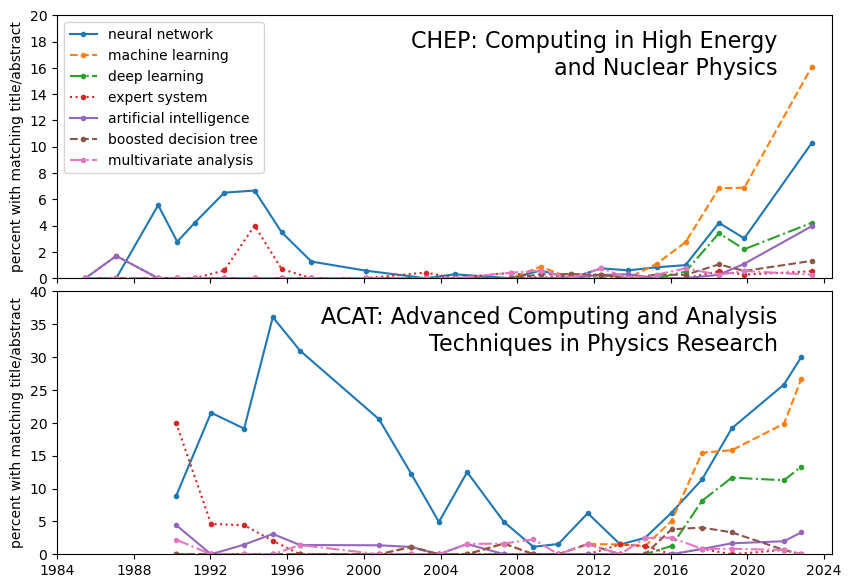

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

lss = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
for i, word in enumerate(words_to_show):
    ax1.plot(chep_tag_date.values(), [100 * chep_matches[tag][word] / chep_totals[tag] for tag in chep_tag_date], ls=lss[i], marker=".", label=word)
    ax2.plot(acat_tag_date.values(), [100 * acat_matches[tag][word] / acat_totals[tag] for tag in acat_tag_date], ls=lss[i], marker=".", label=word)

ax1.legend(loc="upper left")

ax1.set_xlim(np.datetime64("1984-01-01"), np.datetime64("2024-06-01"))
ax1.set_xticklabels([])
ax1.set_ylim(0, 20)
ax1.set_yticks(range(0, 21, 2))
ax1.set_ylabel("percent with matching title/abstract")
ax1.text(0.93, 0.85, "CHEP: Computing in High Energy\nand Nuclear Physics", ha="right", va="center", transform=ax1.transAxes, fontsize=16)

ax2.set_xlim(np.datetime64("1984-01-01"), np.datetime64("2024-06-01"))
ax2.set_ylim(0, 40)
ax2.set_ylabel("percent with matching title/abstract")
ax2.text(0.93, 0.85, "ACAT: Advanced Computing and Analysis\nTechniques in Physics Research", ha="right", va="center", transform=ax2.transAxes, fontsize=16)

plt.subplots_adjust(hspace=0.05)

fig.savefig("PLOTS/chep-acat-2024-ml.svg")

In [9]:
print(f"{'description':<25s}", "|", "regular expression")
print("--------------------------+----------------------------------------------------------------------------------------------------------")
for word in words_to_show:
    print(f"{word:<25s}", "|", words[word].pattern)

description               | regular expression
--------------------------+----------------------------------------------------------------------------------------------------------
neural network            | (NEURAL|[Nn]eural|\bNNs?\b|\bMLPs?\b)
machine learning          | (MACHINE[-_ ]?LEARN|[Mm]achine[-_ ]?[Ll]earn|\bML\b)
deep learning             | (DEEP[-_ ]?LEARN|[Dd]eep[-_ ]?[Ll]earn)
expert system             | (EXPERT[-_ ]?SYSTEM|[Ee]xpert[-_ ]?[Ss]ystem)
artificial intelligence   | (ARTIFICIAL(LY)?[-_ ]?INTELLIGEN|[Aa]rtificial(ly)?[-_ ]?[Ii]ntelligen|\bAIs?\b)
boosted decision tree     | (BOOSTED[-_ ]?DECISION|DECISION[-_ ]?TREE|[Bb]oosted[-_ ]?[Dd]ecision|[Dd]ecision[-_ ]?[Tt]ree|\bBDTs?\b)
multivariate analysis     | (MULTIVARIATE[-_ ]?ANALYS|[Mm]ultivariate[-_ ]?[Aa]nalys|\bT?MVA\b|\bMVAs\b)
